In [ ]:
#FDS_PROJECT
#CS23334-Fundamentals of Data Science
#Members:
#THARUN RAJ - 230701362
#SREYA G - 230701334
#VELAN A - 230701374
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/balaji-fast-food-sales/images.jpeg
/kaggle/input/balaji-fast-food-sales/Balaji Fast Food Sales.csv


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


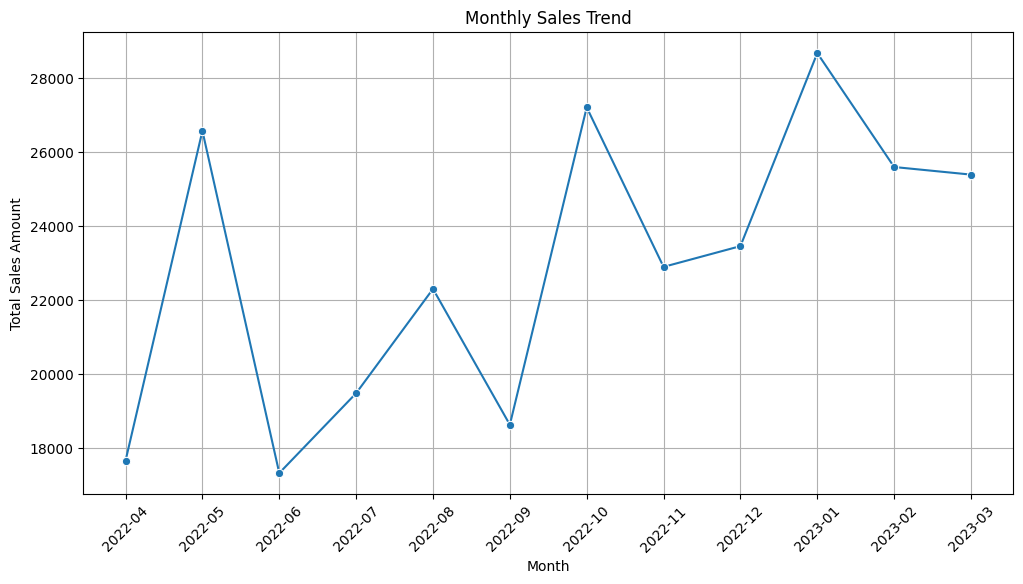

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


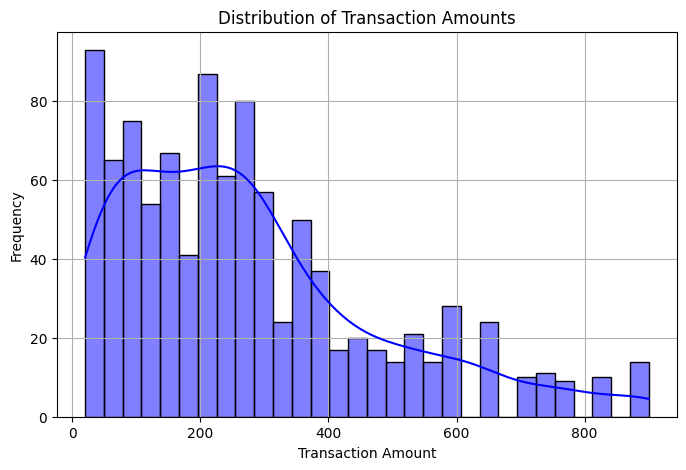

          order_id                        date   item_price     quantity  \
count  1000.000000                        1000  1000.000000  1000.000000   
mean    500.500000  2022-10-03 14:39:50.400000    33.315000     8.162000   
min       1.000000         2022-04-01 00:00:00    20.000000     1.000000   
25%     250.750000         2022-07-04 00:00:00    20.000000     4.000000   
50%     500.500000         2022-10-07 12:00:00    25.000000     8.000000   
75%     750.250000         2023-01-02 00:00:00    50.000000    12.000000   
max    1000.000000         2023-03-30 00:00:00    60.000000    15.000000   
std     288.819436                         NaN    14.921744     4.413075   

       transaction_amount  
count         1000.000000  
mean           275.230000  
min             20.000000  
25%            120.000000  
50%            240.000000  
75%            360.000000  
max            900.000000  
std            204.402979  


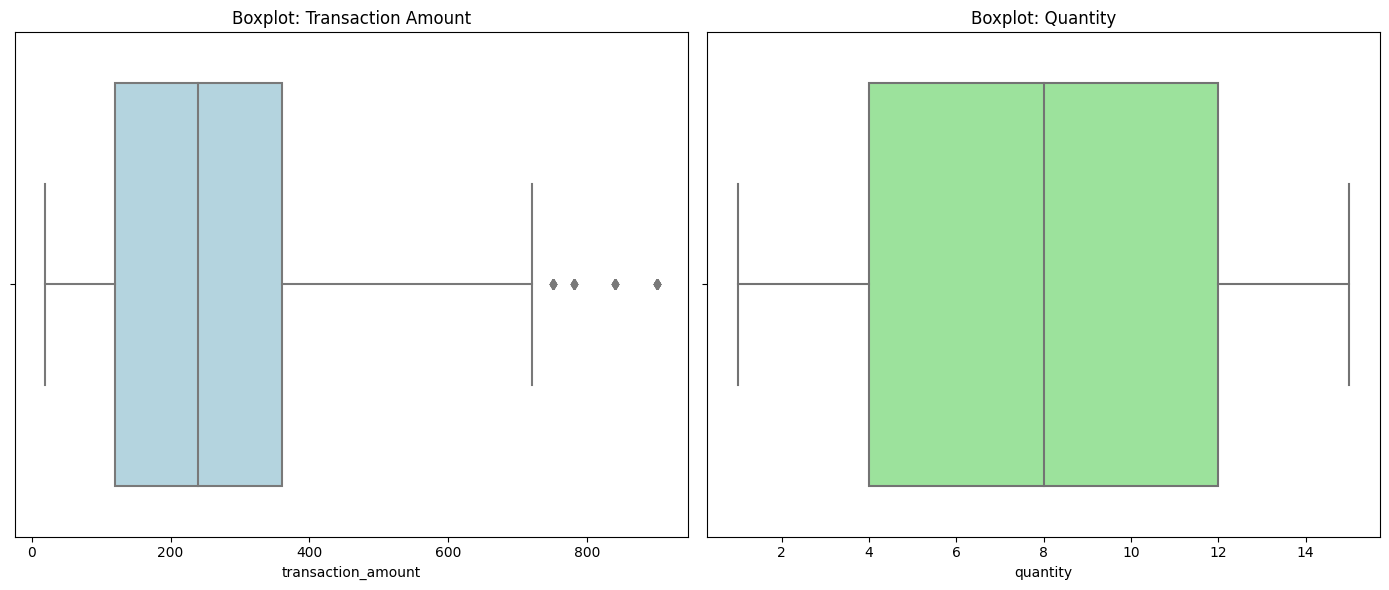

Mean Squared Error: 10298016.80
R-squared Score: 0.52
Predicted Highest Sale in a Month: 29510.87
Predicted Lowest Sale in a Month: 20554.84

Top Selling Items:
item_name
Sandwich           65820.0
Frankie            57500.0
Cold coffee        54440.0
Sugarcane juice    31950.0
Panipuri           24520.0
Name: transaction_amount, dtype: float64


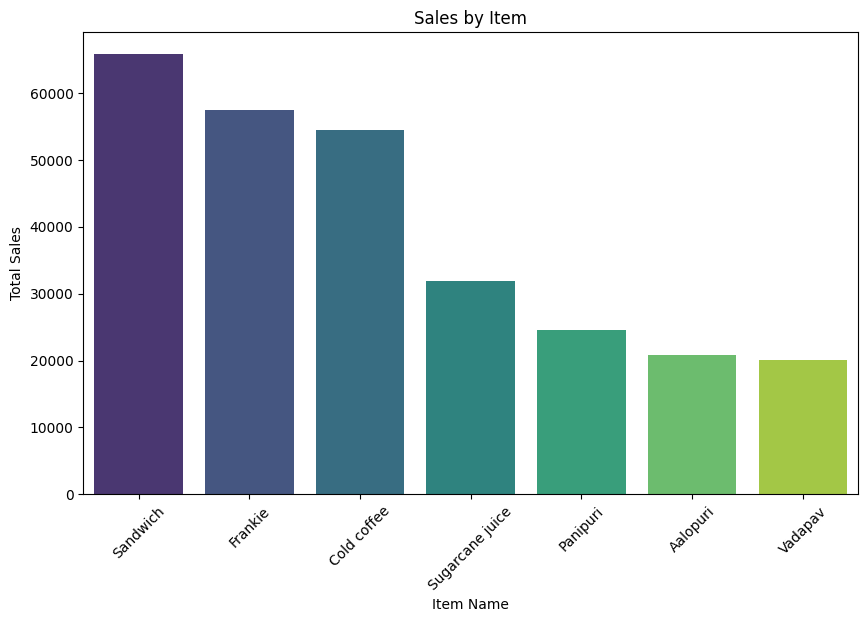

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("/kaggle/input/balaji-fast-food-sales/Balaji Fast Food Sales.csv")

data_cleaned = data.drop(columns=["Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], errors='ignore')

data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')

data_cleaned['item_price'] = data_cleaned['item_price'].replace('[\$,]', '', regex=True).astype(float)
data_cleaned['transaction_amount'] = data_cleaned['transaction_amount'].replace('[\$,]', '', regex=True).astype(float)

data_cleaned['month'] = data_cleaned['date'].dt.to_period('M')

monthly_sales = data_cleaned.groupby('month')['transaction_amount'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['transaction_amount'], bins=30, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print(data_cleaned.describe())

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_cleaned['transaction_amount'], color="lightblue")
plt.title("Boxplot: Transaction Amount")

plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['quantity'], color="lightgreen")
plt.title("Boxplot: Quantity")
plt.tight_layout()
plt.show()


monthly_data = data_cleaned.groupby('month').agg({
    'transaction_amount': 'sum',
    'quantity': 'sum'
}).reset_index()

monthly_data['month_index'] = range(1, len(monthly_data) + 1)

X = monthly_data[['month_index']]
y = monthly_data['transaction_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

future_months = pd.DataFrame({'month_index': range(1, len(monthly_data) + 13)})  # Next 12 months
future_sales = model.predict(future_months)

highest_sale = max(future_sales)
lowest_sale = min(future_sales)
print(f"Predicted Highest Sale in a Month: {highest_sale:.2f}")
print(f"Predicted Lowest Sale in a Month: {lowest_sale:.2f}")

item_sales = data_cleaned.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False)
print("\nTop Selling Items:")
print(item_sales.head())

plt.figure(figsize=(10, 6))
sns.barplot(x=item_sales.index, y=item_sales.values, palette='viridis')
plt.title("Sales by Item")
plt.xlabel("Item Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [54]:
data = pd.read_csv("/kaggle/input/balaji-fast-food-sales/Balaji Fast Food Sales.csv")

print("Information:")
data.info()
print("Description:")
print(data.describe())
print(data.head(10))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            1000 non-null   int64  
 1   date                1000 non-null   object 
 2   item_name           1000 non-null   object 
 3   item_type           1000 non-null   object 
 4   item_price          1000 non-null   object 
 5   quantity            1000 non-null   int64  
 6   transaction_amount  1000 non-null   object 
 7   transaction_type    1000 non-null   object 
 8   received_by         1000 non-null   object 
 9   time_of_sale        1000 non-null   object 
 10  Unnamed: 10         0 non-null      float64
 11  Unnamed: 11         3 non-null      object 
 12  Unnamed: 12         3 non-null      object 
dtypes: float64(1), int64(2), object(10)
memory usage: 101.7+ KB
Description:
          order_id     quantity  Unnamed: 10
count  1000.000000  100

In [55]:
data_cleaned = data.drop(columns=["Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], errors='ignore')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
data_cleaned['transaction_amount'] = data_cleaned['transaction_amount'].replace('[\$,]', '', regex=True).astype(float)
data_cleaned['month'] = data_cleaned['date'].dt.to_period('M')


In [56]:
print(data_cleaned)

     order_id       date        item_name  item_type item_price  quantity  \
0           1 2022-07-03         Aalopuri   Fastfood       $20         13   
1           2 2022-08-23          Vadapav   Fastfood       $20         15   
2           3 2022-11-20          Vadapav   Fastfood       $20          1   
3           4 2023-02-03  Sugarcane juice  Beverages       $25          6   
4           5 2022-10-02  Sugarcane juice  Beverages       $25          8   
..        ...        ...              ...        ...        ...       ...   
995       996 2023-03-19          Frankie   Fastfood       $50         10   
996       997 2022-09-20         Sandwich   Fastfood       $60          7   
997       998 2023-01-26         Sandwich   Fastfood       $60         13   
998       999 2022-08-27         Panipuri   Fastfood       $20          5   
999      1000 2022-05-29         Aalopuri   Fastfood       $20          3   

     transaction_amount transaction_type received_by time_of_sale    month 

Checking****

In [57]:
monthly_sales = data_cleaned.groupby('month')['transaction_amount'].sum()
print(monthly_sales)

month
2022-04    17670.0
2022-05    26570.0
2022-06    17335.0
2022-07    19490.0
2022-08    22305.0
2022-09    18640.0
2022-10    27205.0
2022-11    22900.0
2022-12    23460.0
2023-01    28670.0
2023-02    25595.0
2023-03    25390.0
Freq: M, Name: transaction_amount, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


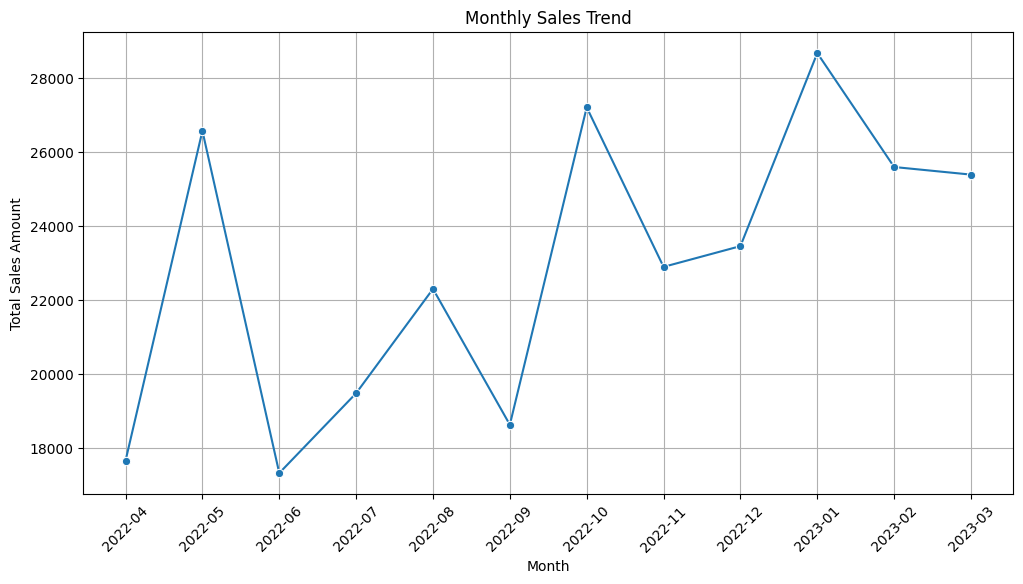

In [58]:
monthly_sales = data_cleaned.groupby('month')['transaction_amount'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


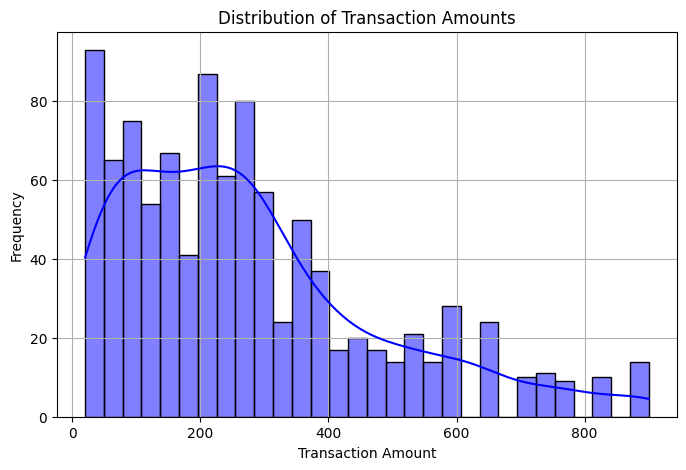

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['transaction_amount'], bins=30, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [60]:
print(data_cleaned.describe())

          order_id                        date     quantity  \
count  1000.000000                        1000  1000.000000   
mean    500.500000  2022-10-03 14:39:50.400000     8.162000   
min       1.000000         2022-04-01 00:00:00     1.000000   
25%     250.750000         2022-07-04 00:00:00     4.000000   
50%     500.500000         2022-10-07 12:00:00     8.000000   
75%     750.250000         2023-01-02 00:00:00    12.000000   
max    1000.000000         2023-03-30 00:00:00    15.000000   
std     288.819436                         NaN     4.413075   

       transaction_amount  
count         1000.000000  
mean           275.230000  
min             20.000000  
25%            120.000000  
50%            240.000000  
75%            360.000000  
max            900.000000  
std            204.402979  


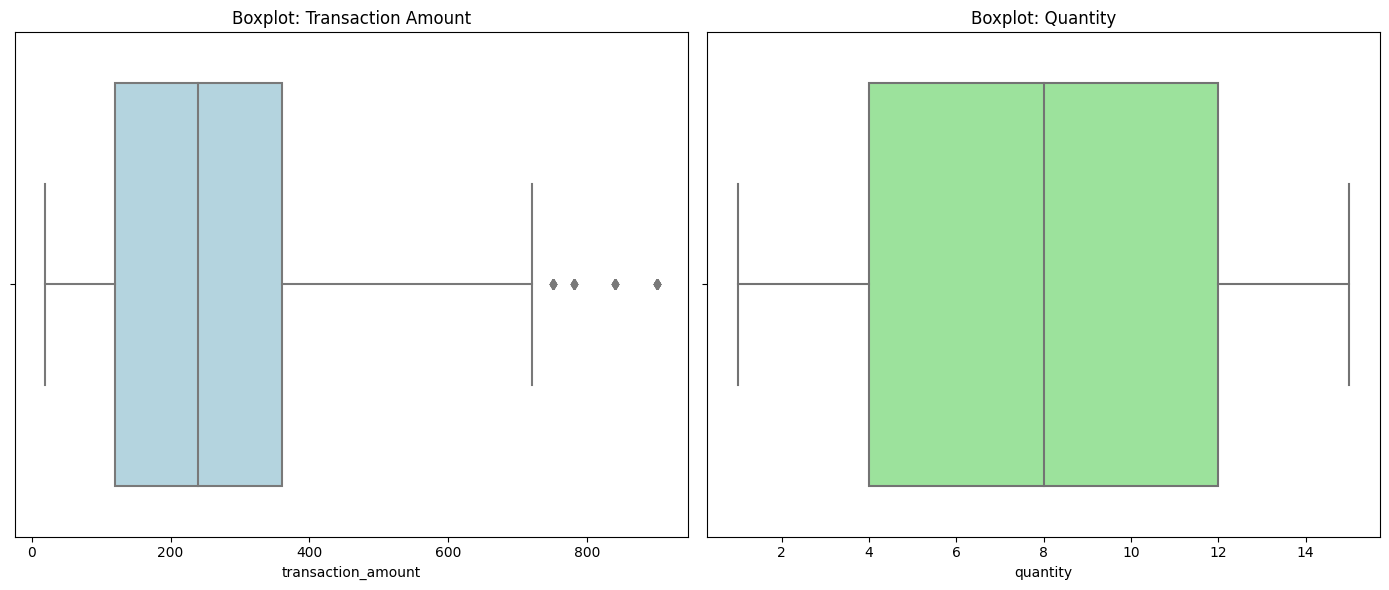

900.0
15


In [61]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_cleaned['transaction_amount'], color="lightblue")
plt.title("Boxplot: Transaction Amount")
plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['quantity'], color="lightgreen")
plt.title("Boxplot: Quantity")
plt.tight_layout()
plt.show()
print(data_cleaned['transaction_amount'].max())
print(data_cleaned['quantity'].max())

In [ ]:
monthly_data = data_cleaned.groupby('month').agg({
    'transaction_amount': 'sum',
    'quantity': 'sum'
}).reset_index()
print(monthly_data)

      month  transaction_amount  quantity
0   2022-04             17670.0       503
1   2022-05             26570.0       826
2   2022-06             17335.0       482
3   2022-07             19490.0       598
4   2022-08             22305.0       743
5   2022-09             18640.0       554
6   2022-10             27205.0       812
7   2022-11             22900.0       682
8   2022-12             23460.0       754
9   2023-01             28670.0       788
10  2023-02             25595.0       695
11  2023-03             25390.0       725


In [63]:
monthly_data['month_index'] = range(1, len(monthly_data) + 1)
monthly_data['month_sin'] = np.sin(2 * np.pi * monthly_data['month_index'] / 12) 
monthly_data['month_cos'] = np.cos(2 * np.pi * monthly_data['month_index'] / 12)
print(monthly_data)

      month  transaction_amount  quantity  month_index     month_sin  \
0   2022-04             17670.0       503            1  5.000000e-01   
1   2022-05             26570.0       826            2  8.660254e-01   
2   2022-06             17335.0       482            3  1.000000e+00   
3   2022-07             19490.0       598            4  8.660254e-01   
4   2022-08             22305.0       743            5  5.000000e-01   
5   2022-09             18640.0       554            6  1.224647e-16   
6   2022-10             27205.0       812            7 -5.000000e-01   
7   2022-11             22900.0       682            8 -8.660254e-01   
8   2022-12             23460.0       754            9 -1.000000e+00   
9   2023-01             28670.0       788           10 -8.660254e-01   
10  2023-02             25595.0       695           11 -5.000000e-01   
11  2023-03             25390.0       725           12 -2.449294e-16   

       month_cos  
0   8.660254e-01  
1   5.000000e-01  
2   6.

In [ ]:
X = monthly_data[['month_index', 'month_sin', 'month_cos']]
y = monthly_data['transaction_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, params, scoring='r2', cv=5)
ridge_grid.fit(X_train_scaled,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [ ]:
ridge_best = ridge_grid.best_estimator_ 
y_pred_ridge = ridge_best.predict(X_test_scaled) 
print("Ridge Regression - Best Alpha:", ridge_grid.best_params_) 
print(f"Ridge Regression - Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.2f}") 
print(f"Ridge Regression - R-squared Score: {r2_score(y_test, y_pred_ridge):.2f}") 



Ridge Regression - Best Alpha: {'alpha': 0.01}
Ridge Regression - Mean Squared Error: 23307067.61
Ridge Regression - R-squared Score: -0.09


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train) 
y_pred_rf = rf.predict(X_test)
print(f"Random Forest - Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Random Forest - R-squared Score: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest - Mean Squared Error: 18240415.41
Random Forest - R-squared Score: 0.15


In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False) 
print("\nRandom Forest Feature Importances:\n", feature_importances)


Random Forest Feature Importances:
              importance
month_index    0.409287
month_sin      0.345160
month_cos      0.245553


In [ ]:
future_months = pd.DataFrame({'month_index': range(1, len(monthly_data) + 13)})

In [ ]:
future_months['month_sin'] = np.sin(2 * np.pi * future_months['month_index'] / 12) 
future_months['month_cos'] = np.cos(2 * np.pi * future_months['month_index'] / 12) 
future_months_scaled = scaler.transform(future_months)
future_sales_rf = rf.predict(future_months_scaled) 
highest_sale_rf = max(future_sales_rf) 
lowest_sale_rf = min(future_sales_rf)
print(f"Predicted Highest Sale in a Month (Random Forest): {highest_sale_rf:.2f}") 
print(f"Predicted Lowest Sale in a Month (Random Forest): {lowest_sale_rf:.2f}") 

Predicted Highest Sale in a Month (Random Forest): 23507.90
Predicted Lowest Sale in a Month (Random Forest): 18626.30


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Top Selling Items:
item_name
Sandwich           65820.0
Frankie            57500.0
Cold coffee        54440.0
Sugarcane juice    31950.0
Panipuri           24520.0
Name: transaction_amount, dtype: float64


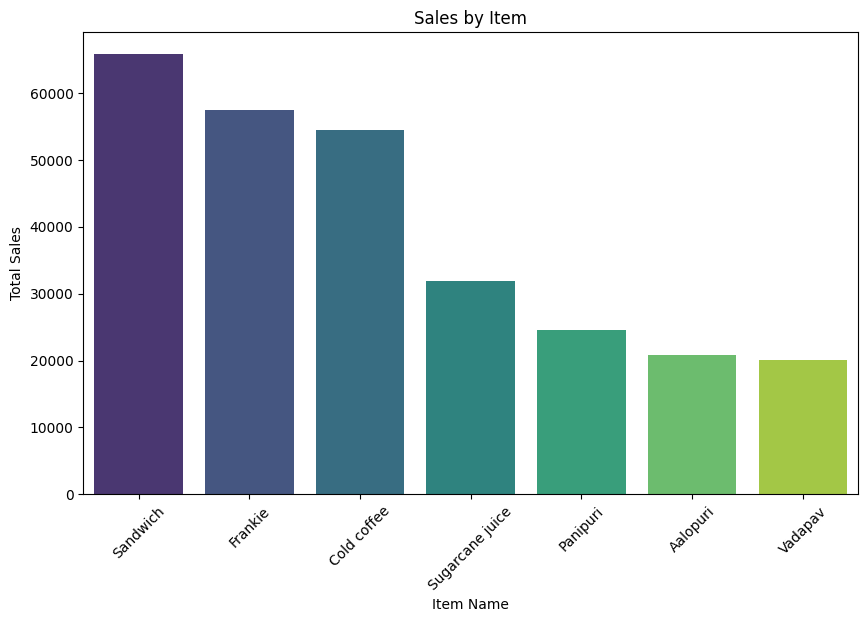

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- month_cos
- month_sin


In [ ]:
item_sales = data_cleaned.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False)
print("\nTop Selling Items:")
print(item_sales.head()) 
plt.figure(figsize=(10, 6)) 
sns.barplot(x=item_sales.index, y=item_sales.values, palette='viridis') 
plt.title("Sales by Item")
plt.xlabel("Item Name") 
plt.ylabel("Total Sales") 
plt.xticks(rotation=45)
plt.show()
